# **CRISP-DM for Customer Satisfaction**  

## **Business Understanding**
Mapping customer satisfaction in Airlines to various features such as Travel Class, Age, Seat comfort, Cleanliness and Food.

This mapping can help determine, which services matter the most to a air traveller and should be worked on, to escalate the customer satisfaction. This inturn might help in retaining the customers and thus growth in business.

## **Data Exploration**
- Get an overview of the dataset structure.

- Identify the type of data and its summary statistics.

- Visualize the distribution of the target variable (satisfaction).

- Visualize the distribution of some key features.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Data_Mining_CMPE_255/Satisfaction.csv')

# Display the first few rows of the dataset
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


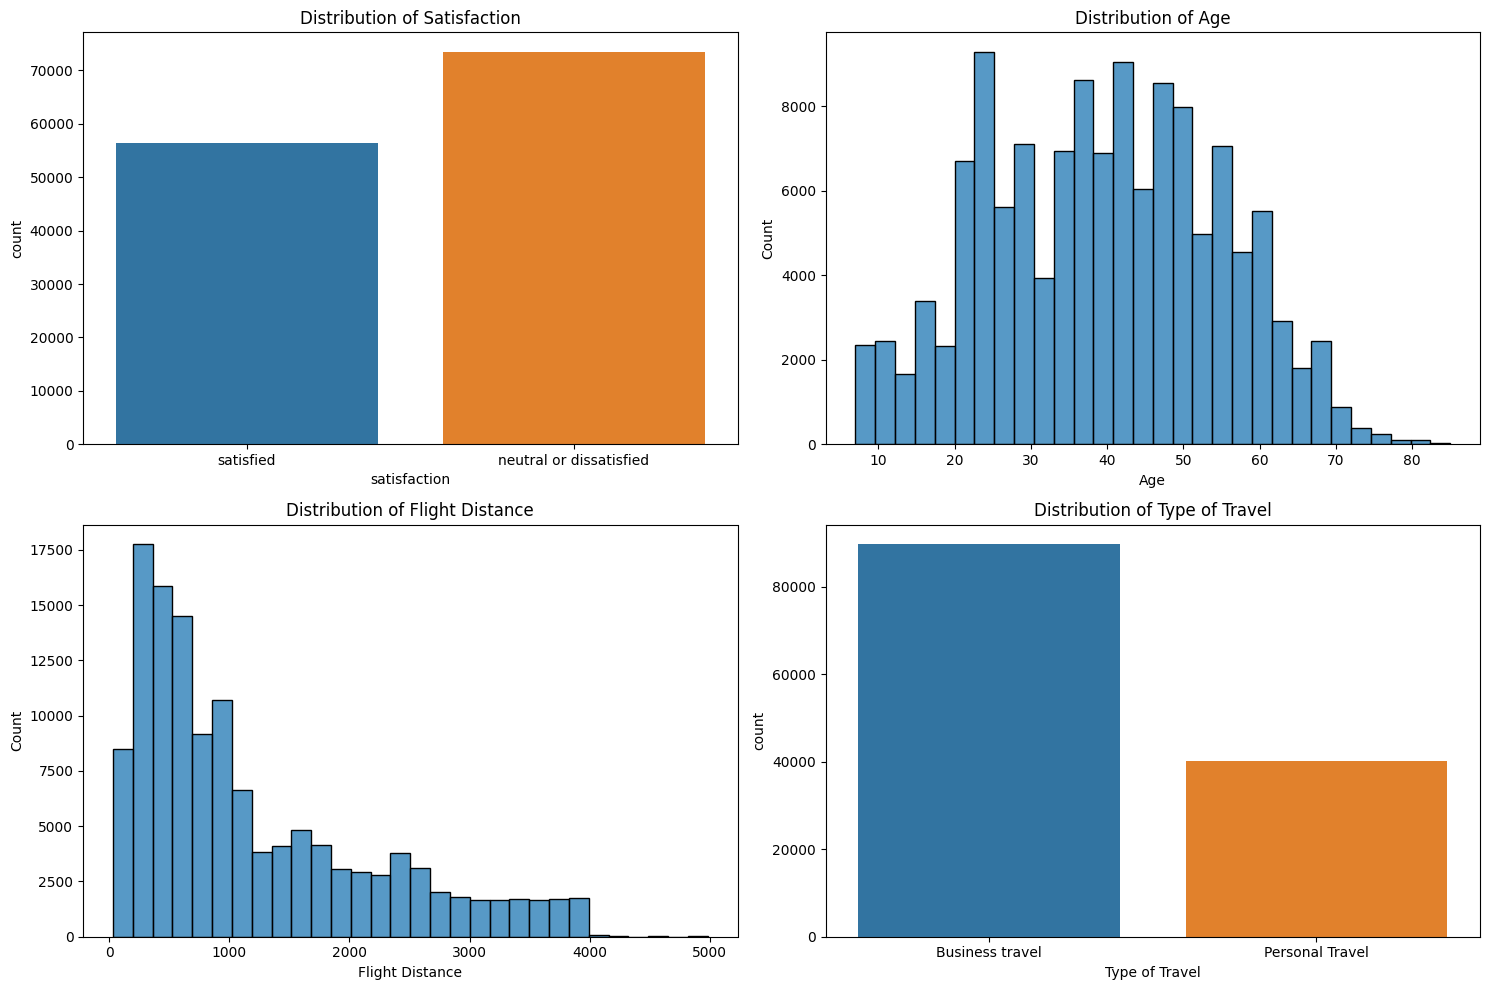

In [3]:
#visualizing the distribution of the target variable (satisfaction) and some of the key features.

import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axis
plt.figure(figsize=(15, 10))

# Subplot 1: Distribution of satisfaction
plt.subplot(2, 2, 1)
sns.countplot(data=data, x='satisfaction')
plt.title('Distribution of Satisfaction')

# Subplot 2: Distribution of Age
plt.subplot(2, 2, 2)
sns.histplot(data=data, x='Age', bins=30)
plt.title('Distribution of Age')

# Subplot 3: Distribution of Flight Distance
plt.subplot(2, 2, 3)
sns.histplot(data=data, x='Flight Distance', bins=30)
plt.title('Distribution of Flight Distance')

# Subplot 4: Distribution of Type of Travel
plt.subplot(2, 2, 4)
sns.countplot(data=data, x='Type of Travel')
plt.title('Distribution of Type of Travel')

plt.tight_layout()
plt.show()

### **Data Exploration - Report:**

- Distribution of Satisfaction: The dataset contains a slightly higher number of passengers who are "neutral or dissatisfied" compared to those who are "satisfied".

- Distribution of Age:
The age distribution of passengers is somewhat uniform, with slight peaks around the early 20s and late 30s to early 50s. This indicates a diverse range of age groups among the passengers.

- Distribution of Flight Distance:
Most flights are short to medium distance, with a peak in the range of 0-500 units (likely kilometers). There is a long tail, indicating a few long-distance flights.

- Distribution of Type of Travel:
A significant number of passengers travel for business purposes compared to personal travel.

## **Data Preparation**

- Handle missing values.
- Encode categorical variables.
- Split the data into training and testing sets.
- Scale the numerical features.

In [18]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Filter out columns with missing values
missing_values = missing_values[missing_values > 0]

missing_values

Series([], dtype: int64)

Given the size of our dataset and the relatively small number of missing values, imputing with the median of the column would be a reasonable approach.

In [19]:
# Impute missing values with the median
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

# Confirm that there are no more missing values
missing_values_after_imputation = data.isnull().sum().sum()
missing_values_after_imputation

0

Now, We'll encode the categorical variables. We'll use one-hot encoding for the categorical features and label encoding for the target variable (satisfaction). This will convert these variables into a format suitable for machine learning algorithms.

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# List of categorical columns to encode
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('satisfaction')  # Remove target column from the list

# One-hot encode the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Label encode the target column 'satisfaction'
label_encoder = LabelEncoder()
data_encoded['satisfaction'] = label_encoder.fit_transform(data_encoded['satisfaction'])

# Display the first few rows of the encoded dataset
data_encoded.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,19556,52,160,5,4,3,4,3,4,3,...,1,1,0,1,0,1,0,0,1,0
1,90035,36,2863,1,1,3,1,5,4,5,...,1,1,0,1,0,1,0,1,0,0
2,12360,20,192,2,0,2,4,2,2,2,...,0,0,1,0,1,1,0,0,1,0
3,77959,44,3377,0,0,0,2,3,4,4,...,1,0,1,1,0,1,0,1,0,0
4,36875,49,1182,2,3,4,3,4,1,2,...,1,1,0,1,0,1,0,0,1,0


Now, we'll split the data into training and testing sets. This will allow us to train our model on one subset of the data and evaluate its performance on another unseen subset.

Let's split the data into a 70% training set and a 30% testing set.

In [21]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data_encoded.drop(columns=['satisfaction', 'id'])  # Drop 'id' as it's just an identifier
y = data_encoded['satisfaction']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90916, 27), (38964, 27), (90916,), (38964,))

The final step in our data preparation is to scale the numerical features. Scaling ensures that all numerical features have the same scale, which can help improve the performance and stability of some machine learning algorithms.

In [22]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
X_train_scaled[:5, :]

array([[-1.68445929, -0.14478803,  0.20602527,  1.26970959,  0.17265295,
         0.79961433, -0.90619608, -0.18560929, -1.09247541, -1.0198883 ,
         0.48060628,  0.49056391,  0.31443264,  0.54903876,  0.30568761,
        -0.98018836,  0.6628776 ,  0.33746301,  0.9867567 , -0.9867567 ,
         0.47420494, -0.47420494, -1.49610358,  1.49610358, -0.95859753,
         1.10812954, -0.27913975],
       [ 0.96206495,  2.77337344,  0.95782112,  0.61452532, -1.2525255 ,
         0.79961433, -0.1540372 ,  0.55448344,  1.18153559,  1.23069823,
         1.25658881,  1.25071098,  1.16122782,  0.54903876,  1.15520297,
        -0.21864703, -0.38597502, -0.39134624, -1.01342104,  1.01342104,
         0.47420494, -0.47420494,  0.66840292, -0.66840292,  1.04319067,
        -0.90242157, -0.27913975],
       [ 0.82973873, -0.82298759, -1.29756642, -1.3510275 ,  0.88524217,
        -1.54491931,  0.59812168, -0.92570203,  1.18153559,  0.48050272,
         0.48060628,  0.49056391,  0.31443264, -0.2395

### To summarize our data preparation:

- We imputed missing values in the "Arrival Delay in Minutes" column.
- We encoded the categorical variables.
- We split the data into training and testing sets.
- We scaled the numerical features to have a mean of 0 and a standard deviation of 1.

## **Modeling**

For the task of predicting customer satisfaction, we will use a classification algorithm.

Logistic Regression: A simple and interpretable model

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

## **Evaluation**

We will evaluate the performance of the trained Logistic Regression model on the test data. We will use the following metrics:

- Accuracy: Proportion of correctly predicted observations to the total observations.
- Precision, Recall, and F1-Score: These metrics provide a more comprehensive view, especially when the classes are imbalanced.
- ROC Curve and AUC: To visualize the performance of the model across different thresholds.

In [10]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

# Predictions using the Logistic Regression model
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

accuracy, class_report, roc_auc

(0.8762704034493378,
 '                         precision    recall  f1-score   support\n\nneutral or dissatisfied       0.88      0.91      0.89     22038\n              satisfied       0.87      0.84      0.85     16926\n\n               accuracy                           0.88     38964\n              macro avg       0.88      0.87      0.87     38964\n           weighted avg       0.88      0.88      0.88     38964\n',
 0.9272752373825593)

Coefficients Plot: This will showcase the importance and direction (positive or negative impact) of each feature in predicting the target variable.


<ipython-input-13-9cf117f76fc7>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_10_coeff_df = coeff_df.head(10).append(coeff_df.tail(10))


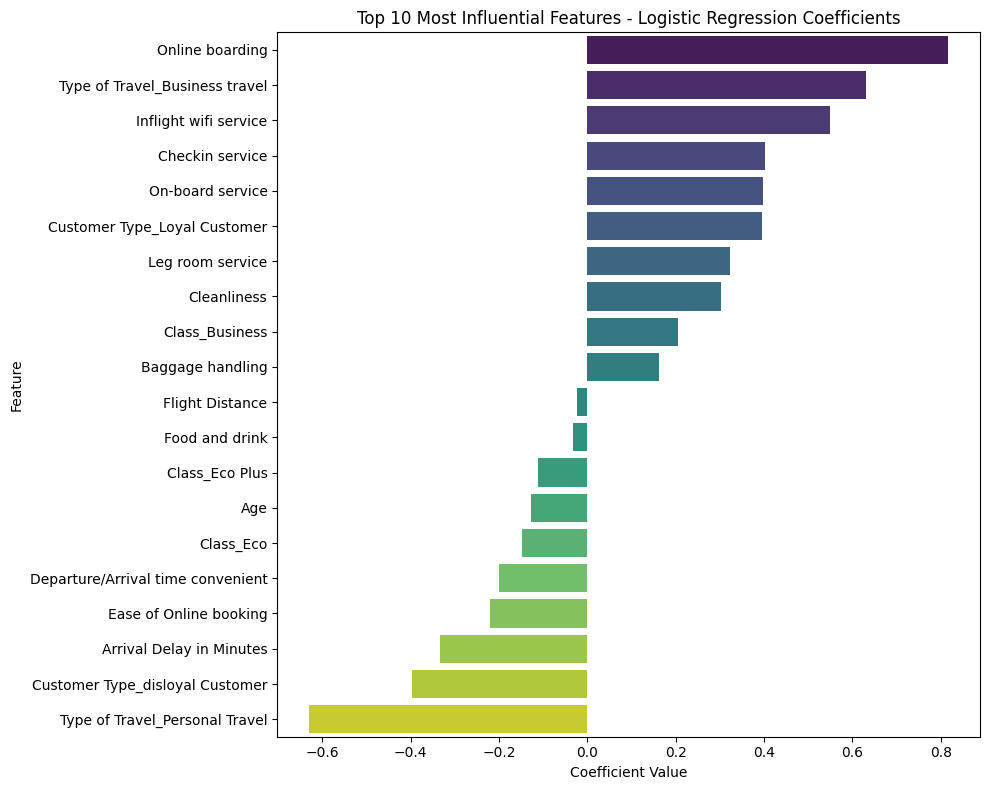

In [13]:
# Select the top 10 most influential features based on coefficient values
top_10_coeff_df = coeff_df.head(10).append(coeff_df.tail(10))

# Plot the top 10 coefficients
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=top_10_coeff_df, palette='viridis')
plt.title('Top 10 Most Influential Features - Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

Histogram of Predicted Probabilities: This can help us understand the distribution of predicted probabilities for both classes.

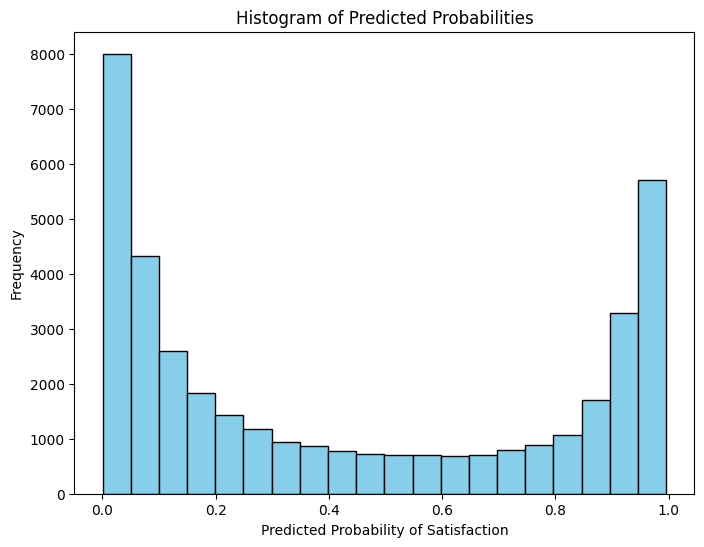

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Predicted probabilities
predicted_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(predicted_probs, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability of Satisfaction')
plt.ylabel('Frequency')
plt.show()

Confusion Matrix: We can visualize the true positives, false positives, true negatives, and false negatives.

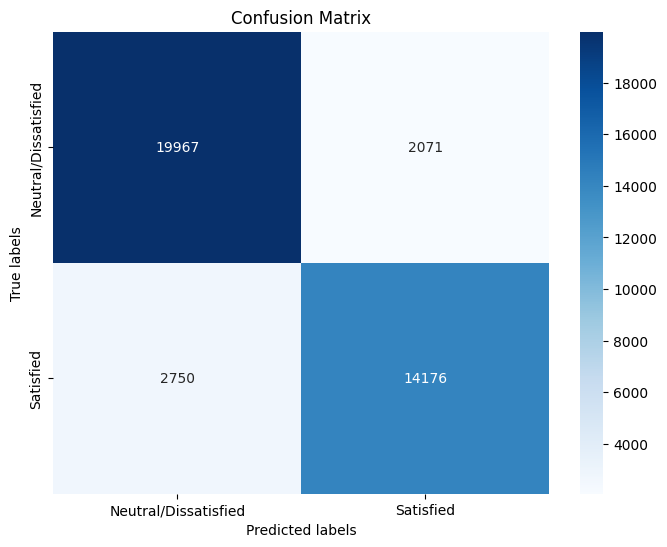

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
predictions = log_reg.predict(X_test_scaled)

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
            yticklabels=['Neutral/Dissatisfied', 'Satisfied'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## **Deployment**

 Saving the model and other necessary preprocessing objects

In [17]:
#Saving the Model
import joblib

# Save the trained model
joblib.dump(log_reg, 'logistic_regression_model.pkl')

# If you also want to save the scaler used for preprocessing:
joblib.dump(scaler, 'scaler.pkl')

# If you want to save the label encoder for the target variable:
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

In the deployment phase, we would usually deploy the trained machine learning model to a production environment where it can be used to make predictions on new, unseen data. Here are the main components and steps involved in deploying the model:

- Model Serialization: Save the trained model using a serialization library such as pickle or joblib, allowing it to be loaded and used later without retraining.
- API Development: Develop an API endpoint using a framework such as Flask or Django, where the saved model can be loaded and used for inference.
- Integration with Front-End:Integrate the API with a front-end application (e.g., a web or mobile app) to allow users to input data and receive predictions.
- Monitoring and Maintenance:Set up monitoring tools to track the performance of the model over time and retrain it as necessary to maintain high performance.
- Documentation:Document the API, including information on how to use it, the expected input format, and the output format.